# <font color="orange">Lending Club Case Study</font>

## <font color='green'>Import the python packages required for the Lending Club Case Study</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re


print('library - ', pd.__name__,' version ' ,pd.__version__)
print('library - ',np.__name__,' version ',np.__version__)
print('library - ',sns.__name__,' version ',sns.__version__)
print('library - ',re.__name__,' version ',re.__version__)
print('library - ',matplotlib.__name__,' version ',matplotlib.__version__)

library -  pandas  version  1.4.3
library -  numpy  version  1.21.5
library -  seaborn  version  0.11.2
library -  re  version  2.2.1
library -  matplotlib  version  3.5.2


## <font color='green'>Data sourcing</font>

In [2]:
#df_lending_club = pd.read_csv("/Users/charanhulmani/Desktop/UpGrad/MSc-IITB & LJMU/Case Study/Lending Load club/loan.csv",header=0,low_memory=False)

df_lending_club = pd.read_csv("/Users/charanhulmani/Desktop/UpGrad/MSc-IITB & LJMU/Case Study/LendingClubCaseStudy/loan.csv",header=0,
                 low_memory=False)
print(df_lending_club.shape)
print(df_lending_club.info())
df_lending_club.head()



(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## <font color='green'> Data cleansing</font>
`1. ` Remove id and member_id columns as they are just unique IDs of loan listing and borrower, which doesn't help to explore any relationships by analysizing the data

In [3]:
df_lending_club.drop(columns=['id','member_id'],inplace=True)

`2. ` Remove the variables having only one distinct value as these will not help to explore any relationships by analysizing the data

In [4]:
df_lending_club = df_lending_club[[col for col in df_lending_club.columns if len(df_lending_club[col].unique()) > 1]]


`3. ` Calculate the percentage of missing values of each column

In [5]:
df_lending_club.isnull().mean() * 100

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000


`4.` Remove the columns which are missing 60% of values

In [6]:
min_count = (0.60) * df_lending_club.shape[0] + 1
df_lending_club.dropna(axis=1, thresh = min_count,inplace=True)

`5. ` Remove desc, title and url columns<br>
   -  Description column is missing 30% of values and it's high level info is covered in title<br>
   -  URL column doesn't have much info other than the loan id in the url query parameter
   -  After looking into the title closely, it is looking like a high level description of the loan `purpose` and it can be removed as the purpose column actually captured that data as a category

In [7]:
df_lending_club.drop(columns=['url','desc','title'],inplace=True)

`6. ` Check the value counts in each column of the dataframe to get an understanding of how the values are distributed

In [8]:
[(col, round((df_lending_club[col].value_counts().to_frame().head()/len(df_lending_club)) * 100)) for col in df_lending_club.columns]


[('loan_amnt',
         loan_amnt
  10000        7.0
  12000        6.0
  5000         5.0
  6000         5.0
  15000        5.0),
 ('funded_amnt',
         funded_amnt
  10000          7.0
  12000          6.0
  5000           5.0
  6000           5.0
  15000          4.0),
 ('funded_amnt_inv',
           funded_amnt_inv
  5000.0               3.0
  10000.0              3.0
  6000.0               3.0
  12000.0              3.0
  8000.0               2.0),
 ('term',
              term
   36 months  73.0
   60 months  27.0),
 ('int_rate',
          int_rate
  10.99%       2.0
  13.49%       2.0
  11.49%       2.0
  7.51%        2.0
  7.88%        2.0),
 ('installment',
          installment
  311.11          0.0
  180.96          0.0
  311.02          0.0
  150.80          0.0
  368.45          0.0),
 ('grade',
     grade
  B   30.0
  A   25.0
  C   20.0
  D   13.0
  E    7.0),
 ('sub_grade',
      sub_grade
  B3        7.0
  A4        7.0
  A5        7.0
  B5        7.0
  B4        6.0

`7. ` From the above observation, below columns have values mostly 0 with few NAN(got to know after checking in excel spreadsheet). The columns/attributes/variables will not help in data analyis and thus they could be removed.<br>
   -  collections_12_mths_ex_med <br>
   -  chargeoff_within_12_mths <br>
   -  tax_liens

In [9]:
columns_to_remove = ['collections_12_mths_ex_med',
                     'chargeoff_within_12_mths',
                     'tax_liens']
df_lending_club.drop(columns = columns_to_remove,inplace = True)

`8. ` Check the value counts of the remaining columns of the dataframe to get an understanding of how the values are distributed. 

In [10]:
[(col, (round((df_lending_club[col].value_counts().to_frame()/len(df_lending_club)) * 100))) for col in df_lending_club.columns]


[('loan_amnt',
         loan_amnt
  10000        7.0
  12000        6.0
  5000         5.0
  6000         5.0
  15000        5.0
  ...          ...
  22875        0.0
  8175         0.0
  19475        0.0
  21225        0.0
  22550        0.0
  
  [885 rows x 1 columns]),
 ('funded_amnt',
         funded_amnt
  10000          7.0
  12000          6.0
  5000           5.0
  6000           5.0
  15000          4.0
  ...            ...
  26250          0.0
  24725          0.0
  31750          0.0
  22625          0.0
  22350          0.0
  
  [1041 rows x 1 columns]),
 ('funded_amnt_inv',
                funded_amnt_inv
  5000.000000               3.0
  10000.000000              3.0
  6000.000000               3.0
  12000.000000              3.0
  8000.000000               2.0
  ...                       ...
  4944.213109               0.0
  18400.281660              0.0
  14659.820000              0.0
  6294.151315               0.0
  11808.924370              0.0
  
  [8205 rows x 1 co

`9. ` Looking at the above value counts, 85+ percent of the values in the below variables are having zero values and thus these variables doesn't help in finding a relationship to see whether the loan may go default because of these variables. So, removing these variables.<br>
   - delinq_2yrs
   - pub_rec
   - out_prncp
   - out_prncp_inv
   - total_rec_late_fee
   - recoveries
   - collection_recovery_fee
   - pub_rec_bankruptcies

In [11]:
columns_to_remove= ['delinq_2yrs', 
                    'pub_rec', 
                    'out_prncp', 
                    'out_prncp_inv',
                    'total_rec_late_fee',
                    'recoveries',
                    'collection_recovery_fee',
                    'pub_rec_bankruptcies']

df_lending_club.drop(columns=columns_to_remove,inplace=True)


`10. ` If the loan_status is 'current', then that loan data will not help in identifying either a default or non-default loan borrower. So, remove the rows with loan_status is 'current'

In [12]:
df_lending_club = df_lending_club[(df_lending_club['loan_status'] != 'Current')]

`11. ` Find the percentage of null values in the dataframe

In [13]:
df_lending_club.isnull().mean()*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_bal              0.000000
revol_util             0.129611
total_acc              0.000000
total_pymnt            0.000000
total_pymnt_inv        0.000000
total_rec_prncp        0.000000
total_rec_int          0.000000
last_pymnt_d           0.184047
last_pymnt_amnt        0.000000
last_cre

`12. ` Standardize the values in emp_length(employee experience). Remove anything other than numbers from 0-9 and < symbol. Furthermore, impute NaN values with median Experience

In [14]:
def standardize_emp_length(emp_experience:str):
    emp_experience = re.sub(r'[^<,0-9]','',str(emp_experience))
    if emp_experience == '<1':
        return 0
    elif emp_experience == '':
        return np.nan
    else:
        return emp_experience

    
df_lending_club['emp_length'] = df_lending_club['emp_length'].apply(lambda x :standardize_emp_length(str(x)))

df_lending_club['emp_length']= df_lending_club['emp_length'].fillna(df_lending_club['emp_length'].median())
df_lending_club['emp_length']= df_lending_club['emp_length'].astype(int)

`13. ` Standardize term by removing the word months

In [15]:
df_lending_club['term'].replace(regex = '[^0-9]',value = '',inplace = True)

`14. ` Round off numeric decimal values with precision 2

In [16]:
df_lending_club = df_lending_club.round(decimals = 2)
df_lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           38577 non-null  int64  
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

`15. ` Find how many distinct emp_title exist

In [17]:
print('Total number of records: ',len(df_lending_club))
print('Total number of distinct employers: ', len(df_lending_club.emp_title.unique()))

print(df_lending_club.emp_title.value_counts().to_frame()['emp_title'].value_counts())

Total number of records:  38577
Total number of distinct employers:  28028
1      24937
2       1962
3        485
4        208
5        101
6         68
7         48
8         33
9         30
10        23
13        17
11        15
14        13
12        10
16         7
15         6
35         5
25         5
18         5
17         5
21         4
20         4
34         3
30         3
52         3
23         3
40         3
42         2
37         2
22         2
131        1
107        1
27         1
28         1
29         1
32         1
33         1
38         1
39         1
45         1
51         1
56         1
57         1
65         1
24         1
Name: emp_title, dtype: int64


` After identifying that there are 24,937 emp_title out of 28,028 have only one of their employee applied for loan. And, 1,962 Employers where 2 of their employees have taken loans. From this data and alos looking at the counts, emp_title could be removed from analysis as it may not help in exploring any information out of the data.`


In [18]:
df_lending_club.drop(columns=['emp_title'],inplace = True )

`16. ` Standardize and validate after standardizing the target variable loan_status

In [19]:
print(df_lending_club['loan_status'].value_counts(),'\n')
df_lending_club['loan_status'] = df_lending_club['loan_status'].apply(lambda x : 'Non-Default' if x == 'Fully Paid' else 'Default' )
print(df_lending_club['loan_status'].value_counts())

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64 

Non-Default    32950
Default         5627
Name: loan_status, dtype: int64


`17. ` Removing the Zip Code as it incomplete data

In [20]:
df_lending_club.drop(columns=['zip_code'],inplace = True )

## <font color='green'>Data Analysis and Visualization</font>
`1. ` Remove Customer behavior attributes. Behavior data is collected after lending the loan and doesn't help for risk analysis for new applicants<br>
   - Remove below columns/variable
       - issue_d
       - earliest_cr_line
       - inq_last_6mths
       - open_acc
       - revol_bal
       - total_acc
       - revol_util
       - total_pymnt
       - total_pymnt_inv
       - total_rec_prncp
       - total_rec_int
       - last_pymnt_d
       - last_pymnt_amnt
       - last_credit_pull_d

In [21]:
columns_to_remove = ['issue_d',
           'earliest_cr_line',
           'inq_last_6mths',
           'open_acc',
           'revol_bal',
           'revol_util',
           'total_acc',
           'total_pymnt',
           'total_pymnt_inv',
           'total_rec_prncp',
           'total_rec_int',
           'last_pymnt_d',
           'last_pymnt_amnt',
          'last_credit_pull_d']
df_lending_club.drop(columns = columns_to_remove, inplace = True)

df_lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  int64  
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

`2. ` Change data type of int_rate to numeric float

In [22]:
df_lending_club['int_rate'] = df_lending_club['int_rate'].apply(lambda x: float(x.replace('%','')))

`3. ` Drop duplicates, if exist. In this case, no duplicates tuple of records founds after doing all the above cleansing

In [23]:
print('Total count of records before dropping duplicates: ', df_lending_club.shape,'\n')
df_lending_club.drop_duplicates(inplace = True)
print('Total count of records aftre dropping duplicates: ', df_lending_club.shape)

Total count of records before dropping duplicates:  (38577, 16) 

Total count of records aftre dropping duplicates:  (38577, 16)


#### <font color='blue'>Keeping the zip_code column as is to help understand the values in it as zip codes without being descrete values</font>

In [24]:
df_lending_club.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Non-Default,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Default,car,GA,1.00
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Non-Default,small_business,IL,8.72
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Non-Default,other,CA,20.00
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Non-Default,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Non-Default,debt_consolidation,NC,23.51
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Non-Default,car,CA,5.35
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Default,small_business,CA,5.55
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,15000.0,Verified,Default,other,TX,18.08
10,6500,6500,6500.0,60,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Non-Default,debt_consolidation,AZ,16.12


`4. ` Loan amount should be  >= funded amount and >= funded amount by investor. And, funded amount should be >= funded amount by investor. Here, in this dataset all the records are satisfying this condition.

In [25]:
print("Total records count before filtering based on loan amount,funded amount and by funded by investor", len(df_lending_club))
df_lending_club = df_lending_club[
                  (df_lending_club.loan_amnt >= df_lending_club.funded_amnt)
                & (df_lending_club.loan_amnt >= df_lending_club.funded_amnt_inv) 
                & (df_lending_club.funded_amnt >= df_lending_club.funded_amnt_inv)]

print("Total records count after filtering based on loan amount,funded amount and by funded by investor", len(df_lending_club),'\n')

print(df_lending_club.isnull().mean() * 100)
df_lending_club.head()

Total records count before filtering based on loan amount,funded amount and by funded by investor 38577
Total records count after filtering based on loan amount,funded amount and by funded by investor 38577 

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
loan_status            0.0
purpose                0.0
addr_state             0.0
dti                    0.0
dtype: float64


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Non-Default,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Default,car,GA,1.00
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Non-Default,small_business,IL,8.72
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Non-Default,other,CA,20.00
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Non-Default,wedding,AZ,11.20


`5. ` <b>`Univariate Analysis`</b> Checking outliers using boxplot

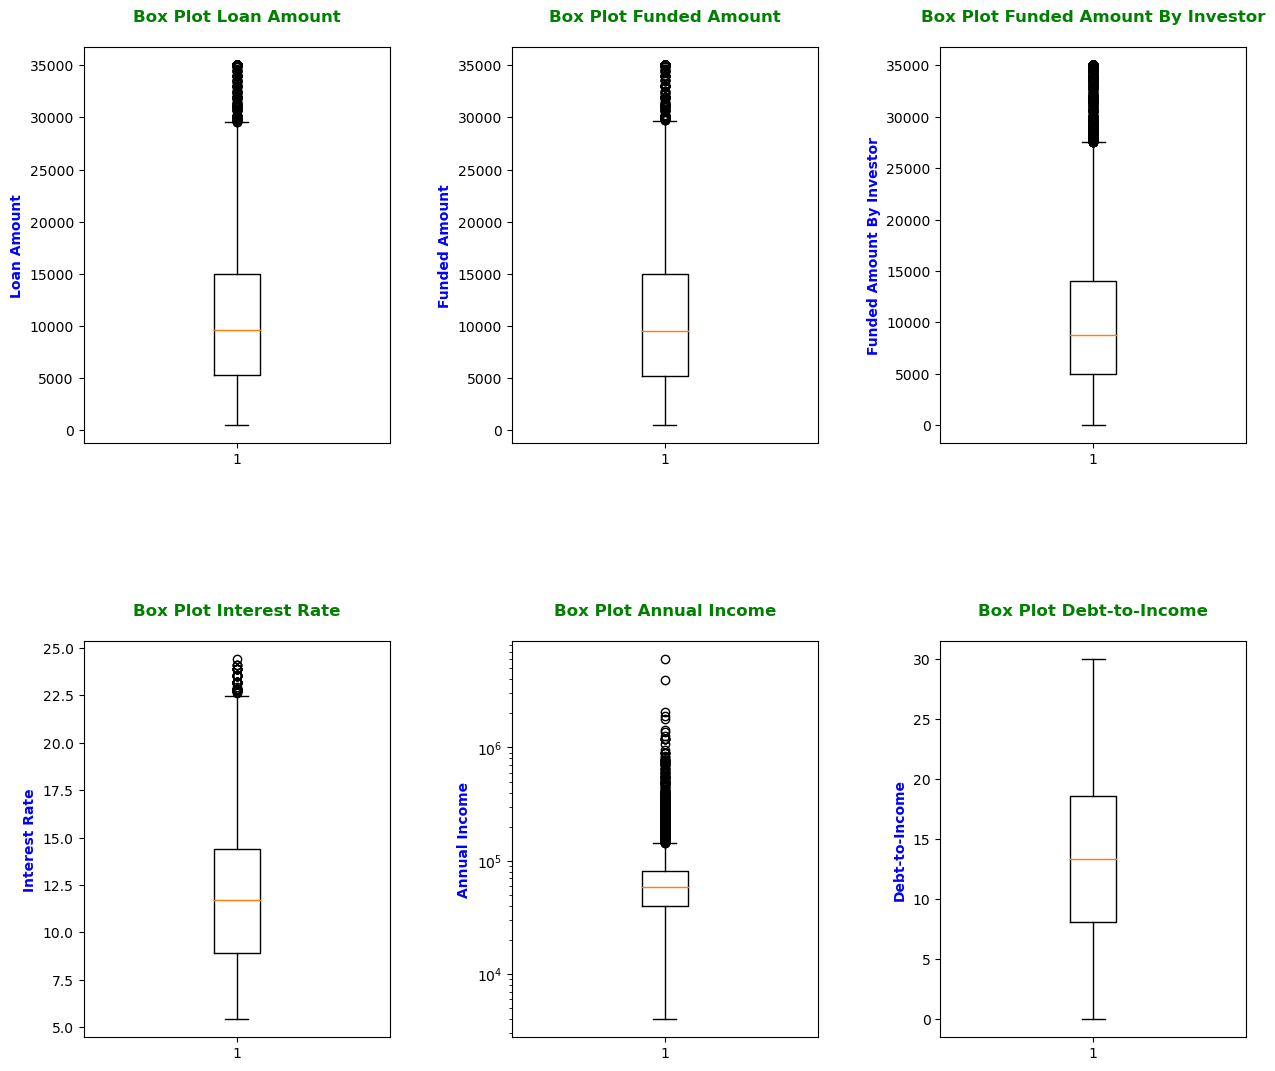

In [26]:
fig, ax = plt.subplots(2,3, sharey=False,figsize=(15,10))
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.5, wspace=0.4)

ax[0,0].set_title('Box Plot Loan Amount\n', fontweight='bold', c='g')
ax[0,0].set_ylabel('Loan Amount',fontsize=10,fontweight='bold',c='b')
ax[0,0].boxplot(df_lending_club.loan_amnt)

ax[0,1].set_title('Box Plot Funded Amount\n' , fontweight='bold', c='g')
ax[0,1].set_ylabel('Funded Amount',fontsize=10,fontweight='bold',c='b')
ax[0,1].boxplot(df_lending_club.funded_amnt)

ax[0,2].set_title('Box Plot Funded Amount By Investor\n', fontweight='bold', c='g')
ax[0,2].set_ylabel('Funded Amount By Investor',fontsize=10,fontweight='bold',c='b')
ax[0,2].boxplot(df_lending_club.funded_amnt_inv)

ax[1,0].set_title('Box Plot Interest Rate\n' , fontweight='bold', c='g')
ax[1,0].set_ylabel('Interest Rate',fontsize=10,fontweight='bold',c='b')
ax[1,0].boxplot(df_lending_club.int_rate)

ax[1,1].set_title('Box Plot Annual Income\n', fontweight='bold', c='g')
ax[1,1].set_ylabel('Annual Income',fontsize=10,fontweight='bold',c='b')
ax[1,1].set_yscale('log')
ax[1,1].boxplot(df_lending_club.annual_inc)

ax[1,2].set_title('Box Plot Debt-to-Income\n' , fontweight='bold', c='g')
ax[1,2].set_ylabel('Debt-to-Income',fontsize=10,fontweight='bold',c='b')
ax[1,2].boxplot(df_lending_club.dti)

plt.show()

`6. ` Removing outliers in,
   - Annual income
   - loan amount

In [27]:
# Calculate percentile
Q1,Q3 = np.percentile(df_lending_club['annual_inc'],q=[25,75])
# Find Inter-Quartile-Range
IQR = Q3 - Q1
#Remove outliers
df_lending_club = df_lending_club[~((df_lending_club['annual_inc'] < (Q1 - 1.5 * IQR)) | (df_lending_club['annual_inc'] > (Q3 + 1.5 * IQR)))]

# Calculate percentile
Q1,Q3 = np.percentile(df_lending_club['loan_amnt'],q=[25,75])
# Find Inter-Quartile-Range
IQR = Q3 - Q1
#Remove outliers
df_lending_club = df_lending_club[~((df_lending_club['loan_amnt'] < (Q1 - 1.5 * IQR)) | (df_lending_club['loan_amnt'] > (Q3 + 1.5 * IQR)))]


<font color='green' size=4 weight='bold'> `7. ` Univariate Analysis</font> 
- Checking the distribution of Loan amount, Funded Amount, Fonded Amount by Investor, Interest Rate, Annual Income and  DTI

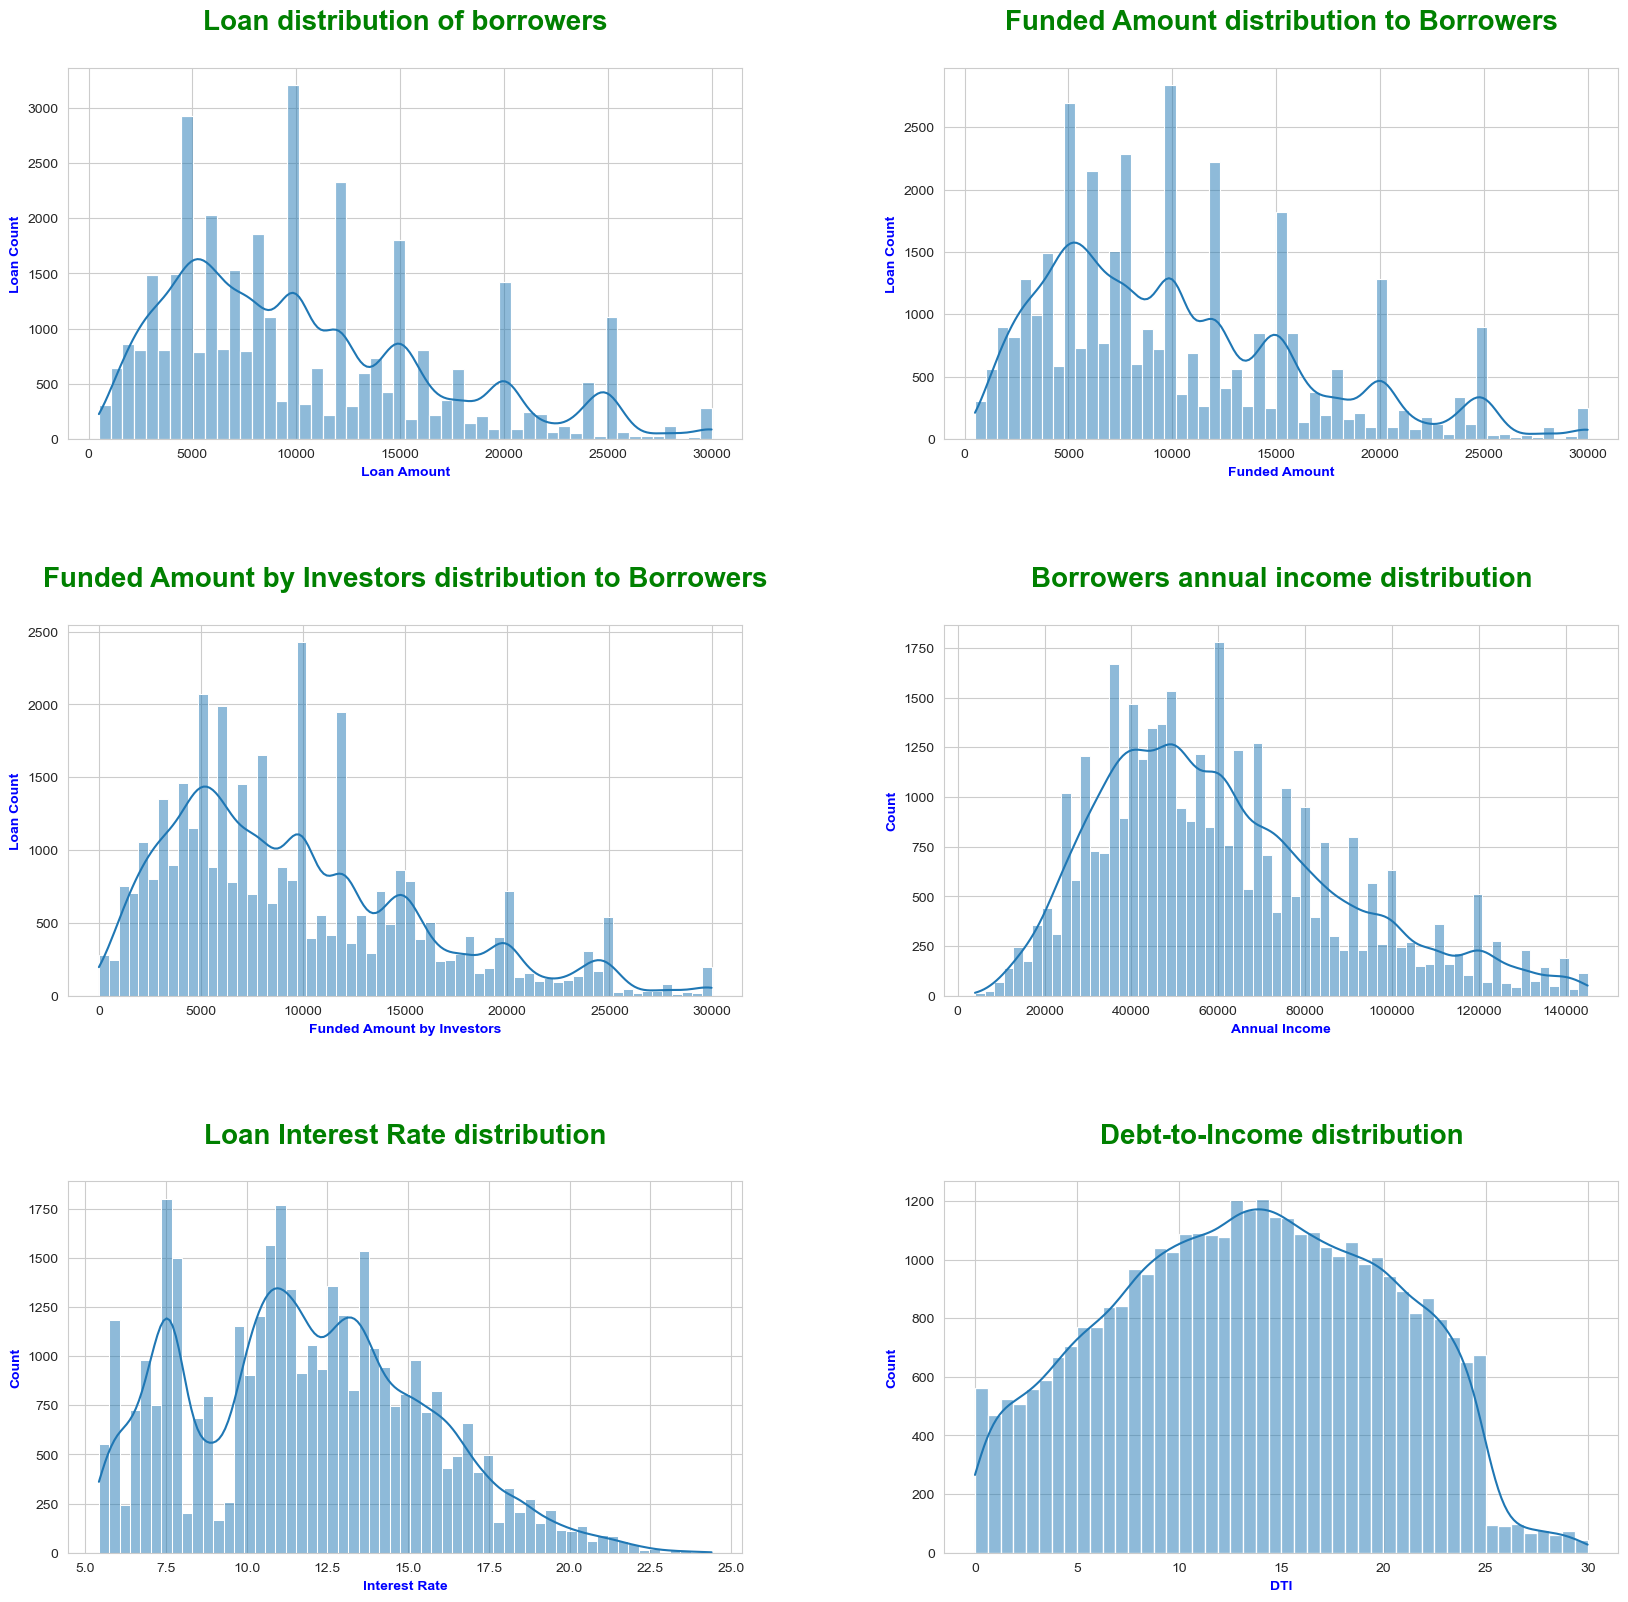

In [28]:



sns.set_style('whitegrid')

fig, ax = plt.subplots(3,2, figsize=(20,15))
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.5, wspace=0.3)

sns.histplot(ax=ax[0,0],x=df_lending_club.loan_amnt, kde=True)
ax[0,0].set_title('Loan distribution of borrowers\n',fontsize="20",fontweight='bold' ,c='g')
ax[0,0].set_xlabel('Loan Amount',fontsize=10,fontweight='bold',c='b')
ax[0,0].set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[0,1],x=df_lending_club.funded_amnt, kde=True)
ax[0,1].set_title('Funded Amount distribution to Borrowers\n',fontsize="20",fontweight='bold' ,c='g')
ax[0,1].set_xlabel('Funded Amount',fontsize=10,fontweight='bold',c='b')
ax[0,1].set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[1,0],x=df_lending_club.funded_amnt_inv, kde=True)
ax[1,0].set_title('Funded Amount by Investors distribution to Borrowers\n',fontsize="20" ,fontweight='bold',c='g')
ax[1,0].set_xlabel('Funded Amount by Investors',fontsize=10,fontweight='bold',c='b')
ax[1,0].set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[1,1],x=df_lending_club.annual_inc, kde=True)
ax[1,1].set_title('Borrowers annual income distribution\n',fontsize="20" ,fontweight='bold',c='g')
ax[1,1].set_xlabel('Annual Income',fontsize=10,fontweight='bold',c='b')
ax[1,1].set_ylabel('Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[2,0],x=df_lending_club.int_rate, kde=True)
ax[2,0].set_title('Loan Interest Rate distribution\n',fontsize="20" ,fontweight='bold',c='g')
ax[2,0].set_xlabel('Interest Rate',fontsize=10,fontweight='bold',c='b')
ax[2,0].set_ylabel('Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[2,1],x=df_lending_club.dti, kde=True)
ax[2,1].set_title('Debt-to-Income distribution\n',fontsize="20" ,fontweight='bold',c='g')
ax[2,1].set_xlabel('DTI',fontsize=10,fontweight='bold',c='b')
ax[2,1].set_ylabel('Count',fontsize=10,fontweight='bold',c='b')
plt.show()


- Many Borrowers are taking loans in between `$5000` to `$15000`, peeks at `$10000` and maximum number of loans taken  are in `$5000` range <br>
- Many Loans are Approved in between `$5000` to `$15000`, peeks at `$10000`and maximum number of loans approved are in `$5000` range <br>
- Many loans are Invested by Investors in between `$5000` to `$15000`, peeks at `$10000`and maximum number of loans invested are in `$50000` range <br>
- Annual income of most of the borrowers is in between `$20,000` and `$80,000`. Furthermore, most Borrower are earning a salry of `$50000` range<br>
- Interest Rate for the loans to borrowers is mostly in between 5% and 15%. Furthermore, most of the loans are lended at an interest rate of arounf 11%<br>
- DTI peeks to 15 from 0 and continues to drops after 15 <br>
        

<font color='green' size=4 weight='bold'> `8. ` Segmented Univariate Analysis on Categorical Variables</font><br>
- Understand the distribution of loans with respect to the categories of,
   - grade
   - home_ownership 
   - verification_status
   - purpose
   - loan_status
   

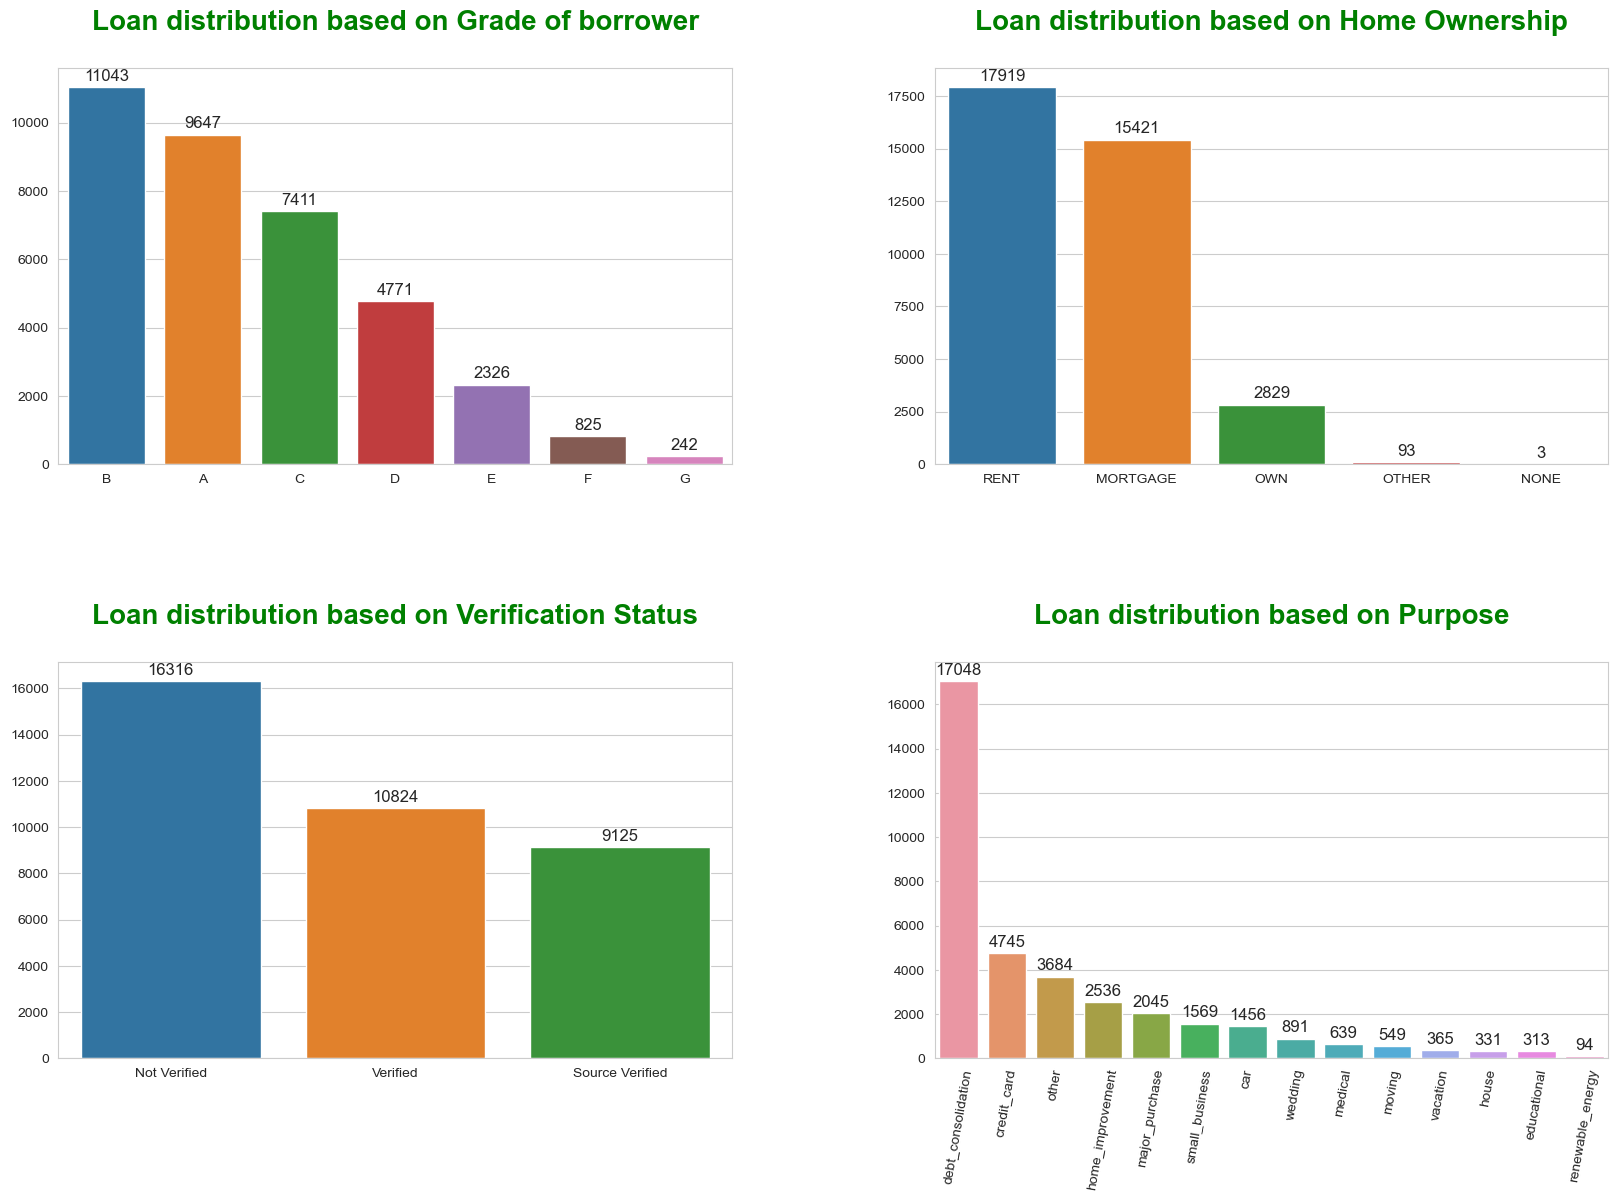

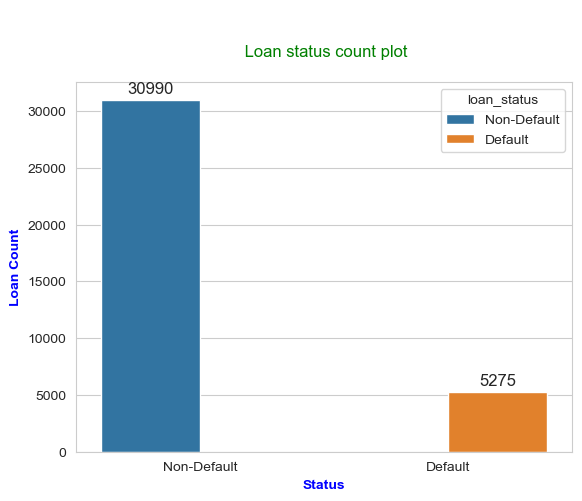

% of loan status across data

             loan_status
Non-Default         85.0
Default             15.0


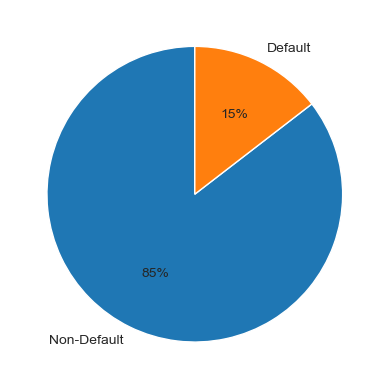

In [29]:
def annotate_plot(plot):
    for bar in plot.patches:
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        plot.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                       size=12,xytext = (0, 8), 
                       textcoords = 'offset points')

grade_value_counts =  df_lending_club.grade.value_counts()
home_ownership_value_counts =  df_lending_club.home_ownership.value_counts()
verification_status_value_counts = df_lending_club.verification_status.value_counts()
purpose_value_counts = df_lending_club.purpose.value_counts()

fig, ax = plt.subplots(2,2, figsize=(20,10))
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.5, wspace=0.3)

sns.barplot(ax=ax[0,0],x=grade_value_counts.index,y=grade_value_counts.values)
ax[0,0].set_title('Loan distribution based on Grade of borrower\n',fontsize="20",fontweight='bold' ,c='g')
annotate_plot(ax[0,0])

sns.barplot(ax=ax[0,1],x=home_ownership_value_counts.index,y=home_ownership_value_counts.values)
ax[0,1].set_title('Loan distribution based on Home Ownership\n',fontsize="20",fontweight='bold' ,c='g')
annotate_plot(ax[0,1])

sns.barplot(ax=ax[1,0],x=verification_status_value_counts.index,y=verification_status_value_counts.values)
ax[1,0].set_title('Loan distribution based on Verification Status\n',fontsize="20" ,fontweight='bold',c='g')
annotate_plot(ax[1,0])

purpose_value_counts_barplot = sns.barplot(ax=ax[1,1],x=purpose_value_counts.index,y=purpose_value_counts.values)
ax[1,1].set_title('Loan distribution based on Purpose\n',fontsize="20",fontweight='bold' ,c='g')
ax[1,1].set_xticklabels(
    labels=purpose_value_counts.index, rotation=80)
annotate_plot(ax[1,1])

plt.show()


# checking different loan status counts in data

ax = sns.countplot(x='loan_status', data=df_lending_club,hue='loan_status')
ax.set_title('\n\n Loan status count plot\n', c='g')
ax.set_xlabel('Status',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')
annotate_plot(ax)
plt.show()

print("% of loan status across data\n")
print((df_lending_club['loan_status'].value_counts(normalize=True).to_frame().round(decimals = 2) *100))

loan_status_counts = df_lending_club.loan_status.value_counts()
plt.pie(loan_status_counts, startangle=90,labels = loan_status_counts.index,autopct='%1.0f%%')
plt.show()

<font color='green' size=4 weight='bold'> `9. ` Univariate Analysis : Categorical Variable Sub-Plots</font>

In [30]:
def get_default_non_default_loan_percentage_and_ratio(column_name:str):
    
    df_default_loan_column_name = df_lending_club[(df_lending_club['loan_status']=='Default')][[column_name]]
    df_non_default_loan_column_name = df_lending_club[(df_lending_club['loan_status']=='Non-Default')][[column_name]]

    df_default_loan_column_name_percent = df_default_loan_column_name.value_counts().to_frame()/len(df_lending_club) * 100
    
    df_non_default_loan_column_name_percent = df_non_default_loan_column_name.value_counts().to_frame()/len(df_lending_club) *100

    df_loan_column_name_percent = df_default_loan_column_name_percent.merge(df_non_default_loan_column_name_percent,
                                                                                how = 'inner' , on = column_name)

    df_loan_column_name_percent.rename(columns={'0_x':'%Tot.Default','0_y':'%Tot.Non-Default'},inplace=True)
    df_loan_column_name_percent['%Total'] = df_loan_column_name_percent['%Tot.Default'] + df_loan_column_name_percent['%Tot.Non-Default']
    df_loan_column_name_percent['Ratio'] = df_loan_column_name_percent['%Tot.Default']/df_loan_column_name_percent['%Tot.Non-Default']
    df_loan_column_name_percent['% of Default'] = (df_loan_column_name_percent['%Tot.Default']/df_loan_column_name_percent['%Total']) * 100                        
    df_loan_column_name_percent = df_loan_column_name_percent.sort_values(by='Ratio').round(decimals=2)
    df_loan_column_name_percent['% of Default'] = df_loan_column_name_percent['% of Default'].astype(int)
    
    return(df_loan_column_name_percent)


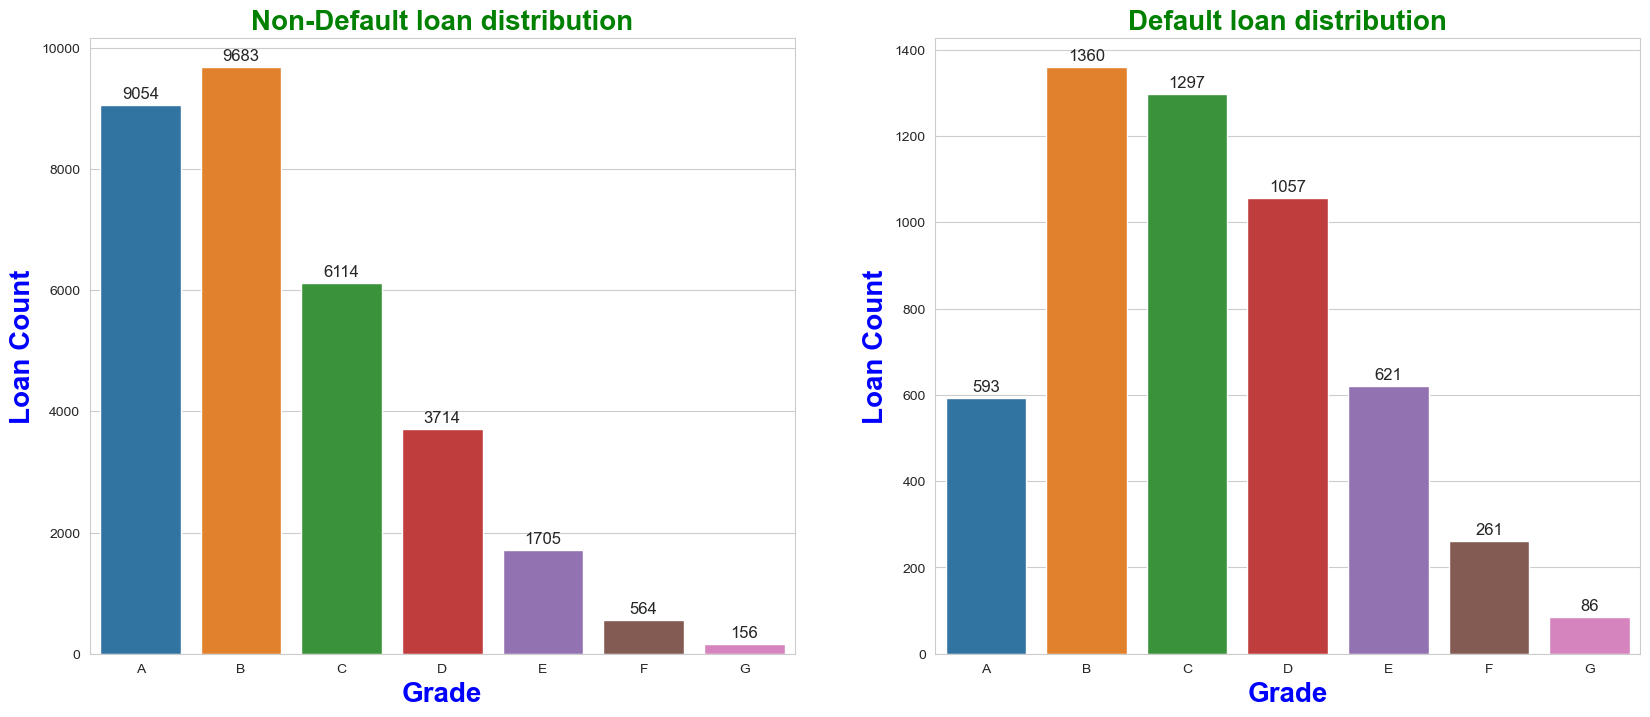

       %Tot.Default  %Tot.Non-Default  %Total  Ratio  % of Default
grade                                                             
A              1.64             24.97   26.60   0.07             6
B              3.75             26.70   30.45   0.14            12
C              3.58             16.86   20.44   0.21            17
D              2.91             10.24   13.16   0.28            22
E              1.71              4.70    6.41   0.36            26
F              0.72              1.56    2.27   0.46            31
G              0.24              0.43    0.67   0.55            35


In [31]:


grade_order_to_display = sorted(df_lending_club.grade.unique().tolist())

fig, ax = plt.subplots(1,2, figsize= (20,8), sharey= False)

sns.countplot(ax=ax[0], x='grade',order=grade_order_to_display,
              data=df_lending_club[df_lending_club['loan_status']=='Non-Default'])
ax[0].set_xlabel('Grade',fontsize=20,fontweight='bold',c='b')
ax[0].set_ylabel('Loan Count',fontsize=20,fontweight='bold',c='b')
ax[0].set_title('Non-Default loan distribution',fontsize=20, fontweight='bold',c='g')
annotate_plot(ax[0])
sns.countplot(ax=ax[1], x='grade',order=grade_order_to_display,
              data=df_lending_club[df_lending_club['loan_status']=='Default'])
ax[1].set_xlabel('Grade',fontsize=20,fontweight='bold',c='b')
ax[1].set_ylabel('Loan Count',fontsize=20,fontweight='bold',c='b')
ax[1].set_title('Default loan distribution', fontsize=20,fontweight='bold',c='g')
annotate_plot(ax[1])
plt.show()

print(get_default_non_default_loan_percentage_and_ratio('grade'))


### Inference
- From the above bar plot, %Total Default  %Total Non-Default  %Total  Ratio  % of Default for each grade, 
    - we can say that the borrower of a grade will most likely will be a defaulter in the below order
        - G, F, E, D, C, B, A

    - we can say that the borrower of a grade will most likely will pay off the loan in the below order
        - A, B, C, D, E, F, G

Overall,<br>
   - Grade A borrowers are very trustworthy people and could be offered loans
   - Grade G borrowers are  untrustworthy people and one should investigate more before approving the loans to them


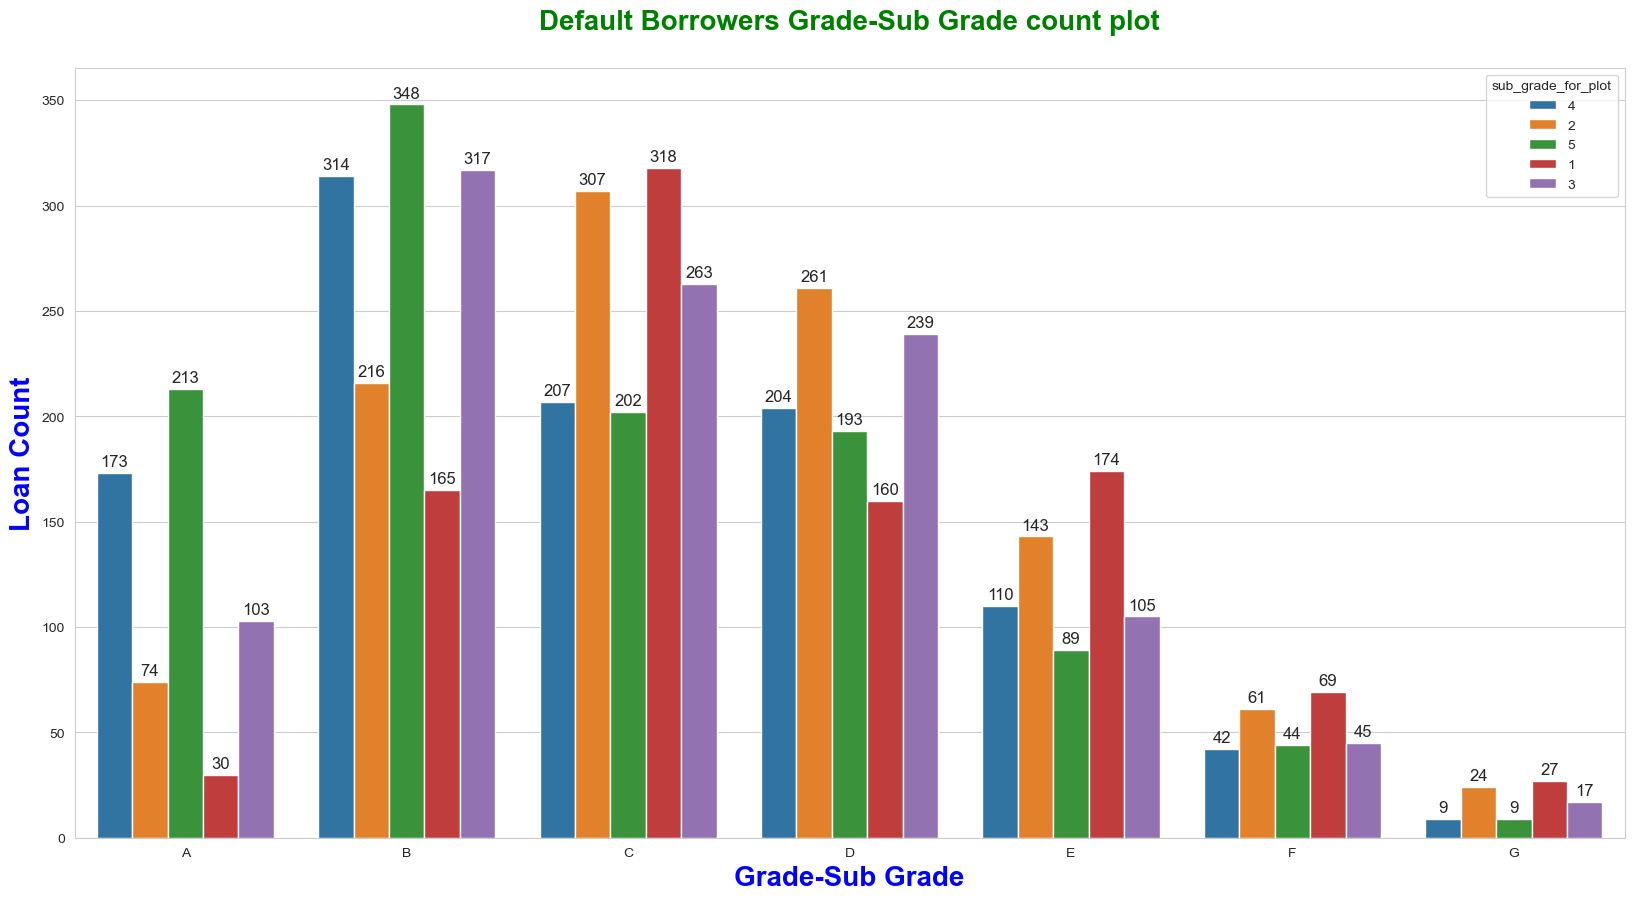

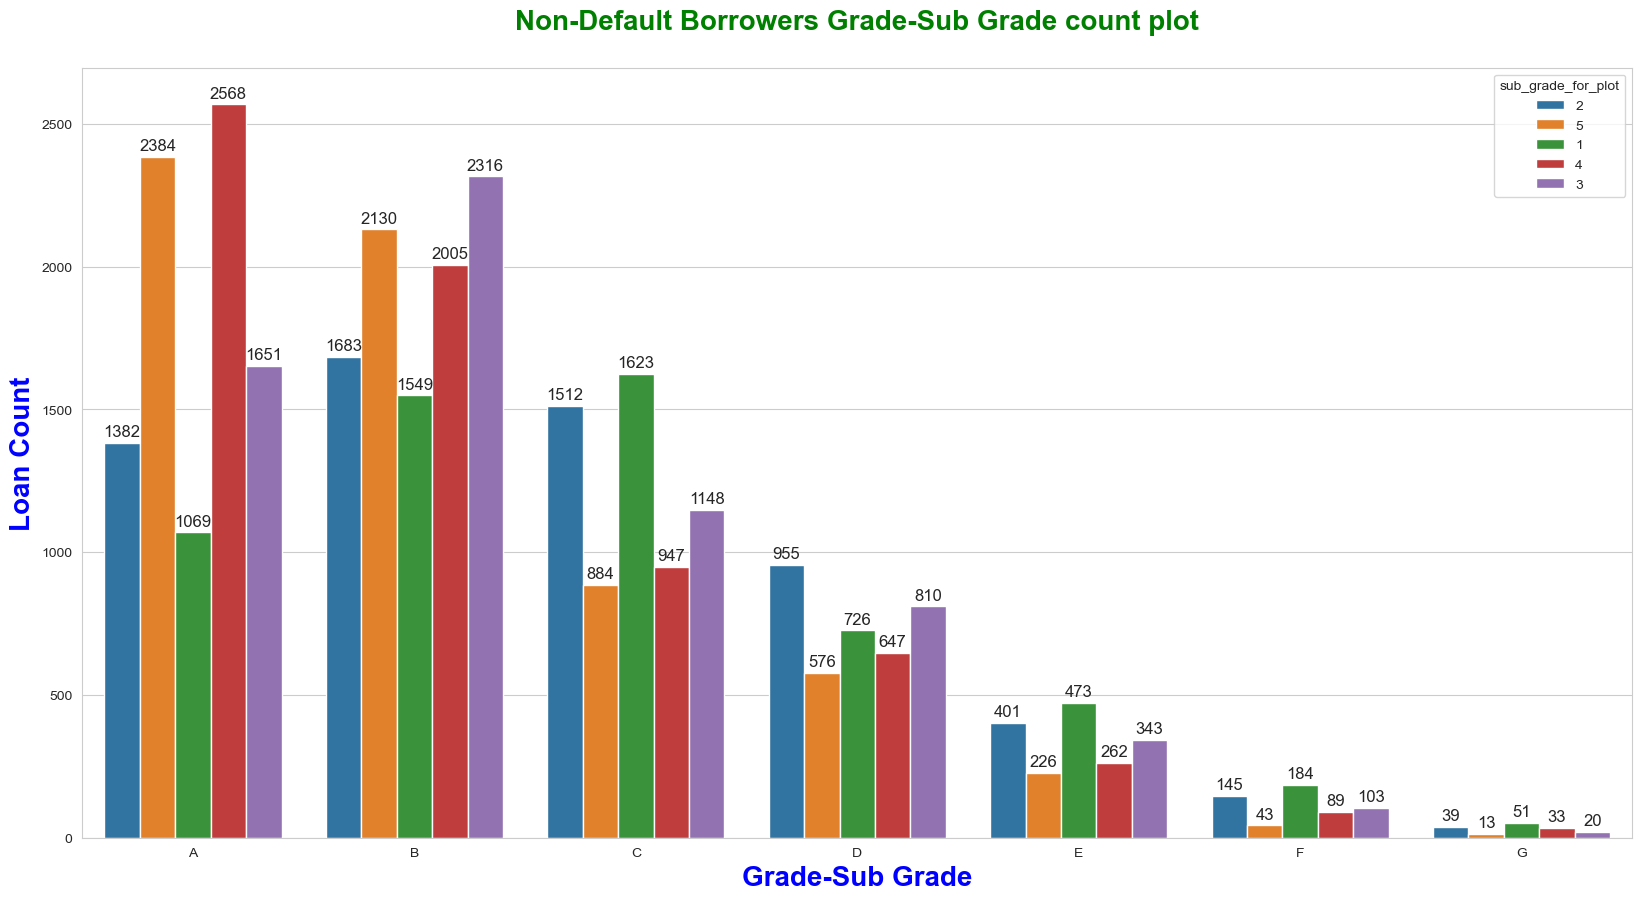

           %Tot.Default  %Tot.Non-Default  %Total  Ratio  % of Default
sub_grade                                                             
A1                 0.08              2.95    3.03   0.03             2
A2                 0.20              3.81    4.01   0.05             5
A3                 0.28              4.55    4.84   0.06             5
A4                 0.48              7.08    7.56   0.07             6
A5                 0.59              6.57    7.16   0.09             8
B1                 0.45              4.27    4.73   0.11             9
B2                 0.60              4.64    5.24   0.13            11
B3                 0.87              6.39    7.26   0.14            12
B4                 0.87              5.53    6.39   0.16            13
B5                 0.96              5.87    6.83   0.16            14
C1                 0.88              4.48    5.35   0.20            16
C2                 0.85              4.17    5.02   0.20            16
C4    

In [32]:

## Now merging in sub grade along with grade variable

## Removing the letter in the sub_grade and keeping the number only, which is good enought to Identify the subgrade
# and it helps to visualize the data in countplot
df_lending_club['sub_grade_for_plot'] = df_lending_club.sub_grade.apply(lambda x : x[-1])
df_lending_club.sub_grade_for_plot.unique()

## Sub Grade distibution for persons who have defaulted
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade_for_plot',data=df_lending_club[df_lending_club['loan_status']=='Default'])
ax.set_title('Default Borrowers Grade-Sub Grade count plot\n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabel('Grade-Sub Grade',fontsize=20,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=20,fontweight='bold',c='b')
annotate_plot(ax)
plt.show()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade_for_plot',data=df_lending_club[df_lending_club['loan_status']=='Non-Default'])
ax.set_title('Non-Default Borrowers Grade-Sub Grade count plot\n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabel('Grade-Sub Grade',fontsize=20,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=20,fontweight='bold',c='b')
annotate_plot(ax)
plt.show()

print(get_default_non_default_loan_percentage_and_ratio('sub_grade'))

### Inference
- From the above bar plot, %Total Default  %Total Non-Default  %Total  Ratio  % of Default each grade, 
    - we can say that the borrower of a grade with subgrades, the risk or lending a loan increses in the below order
        - A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C4, D1, C5, C3, G4, D2, D3, E3, D4, D5, E2, E1, F1, E5, E4, F2, F3, F4, G1, G2, G5, G3, F5  

    - Borrower A with subgrade 1 is the best borrower who pay off the loan on time. Borrower F with subgrade 5 is the worst performer in repaying a loan

Overall,
- For Grade A borrowers, risk of lending loan increases from subgrade 1, 2, 3, 4, 5.
- For Grade B borrowers, risk of lending loan increases from subgrade 1, 2, 3, 4, 5.
- For Grade C borrowers, risk of lending loan increases from subgrade 1, 2, 4, 5, 3.
- For Grade D borrowers, risk of lending loan increases from subgrade 1, 2, 3, 4, 5.
- For Grade E borrowers, risk of lending loan increases from subgrade 3, 2, 1, 5, 4.
- For Grade F borrowers, risk of lending loan increases from subgrade 3, 2, 1, 5, 4.

<font color='blue'> 2 out of 100 borrowers of A1 subgrade may go as loan defaulters and 50 out of 100 F5 subgrade people can go as defaulters. </font><br>



<font color='green' size=4 weight='bold'> `8. ` Bivariate Categorical Analysis</font>

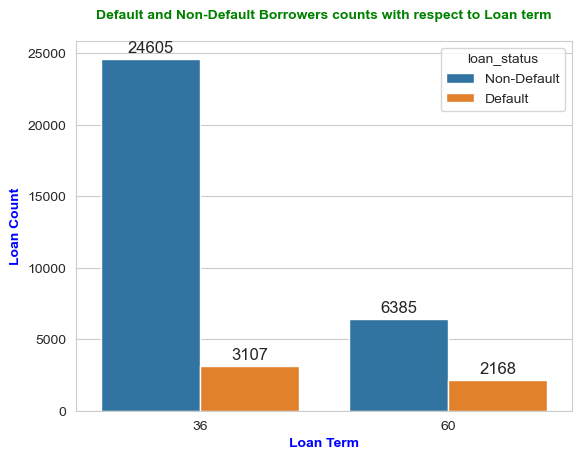

      %Tot.Default  %Tot.Non-Default  %Total  Ratio  % of Default
term                                                             
36            8.57             67.85   76.42   0.13            11
60            5.98             17.61   23.58   0.34            25


In [33]:
## Since term is an important variable and as it only has two distinct values (36, 60) in months. 


ax = sns.countplot(x='term',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers counts with respect to Loan term\n', fontsize=10, fontweight='bold',c='g')
ax.set_xlabel('Loan Term',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')
annotate_plot(ax)
plt.show()
print(get_default_non_default_loan_percentage_and_ratio('term'))


### Inference
- From the above bar plot, %Total Default  %Total Non-Default  %Total  Ratio  % of Default, we can say,
    - 11 out of 100 borrowers who takes loan for 36 months EMI wll go as defaulter. Whereas, for 60 months plan, 25 out of 100 can go as defaulter.
    - ` Risk in lending loan for borrowers who requests 60months EMI plan is 2.4 times more compared to borrowers who requests 36 months EMI plan `



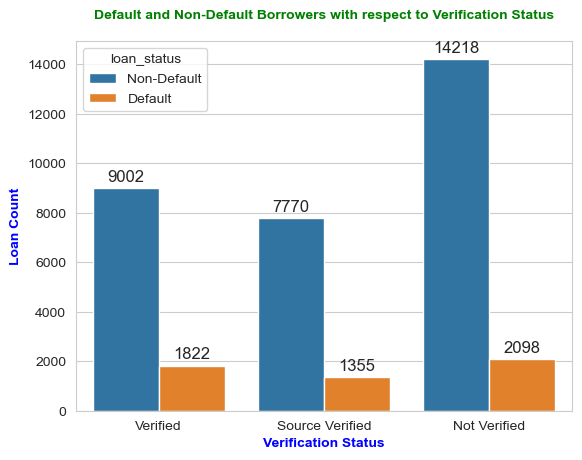

                     %Tot.Default  %Tot.Non-Default  %Total  Ratio  \
verification_status                                                  
Not Verified                 5.79             39.21   44.99   0.15   
Source Verified              3.74             21.43   25.16   0.17   
Verified                     5.02             24.82   29.85   0.20   

                     % of Default  
verification_status                
Not Verified                   12  
Source Verified                14  
Verified                       16  


In [34]:
## Verification status is another important variable can affect the loan status, lets check
#Income Verified (Pay Slips, Tax Returns)
#Income Source Verified (3rd Party vendors has checked) • Not Verified)


ax = sns.countplot(x='verification_status',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to Verification Status\n', fontsize=10, fontweight='bold',c='g')
ax.set_xlabel('Verification Status',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')
annotate_plot(ax)
plt.show()

print(get_default_non_default_loan_percentage_and_ratio('verification_status'))


### Inference
- From the above bar plot, %Total Default  %Total Non-Default  %Total  Ratio  % of Default, it appears that the risk of lending a loan to borrower increases from Not Verified, Source Verified and Verified. More risk involved in lending loan to Verified borrowers than Non Verified borrowers`

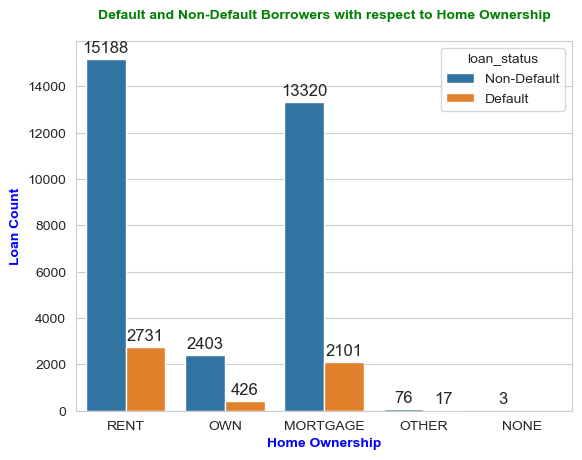

                %Tot.Default  %Tot.Non-Default  %Total  Ratio  % of Default
home_ownership                                                             
MORTGAGE                5.79             36.73   42.52   0.16            13
OWN                     1.17              6.63    7.80   0.18            15
RENT                    7.53             41.88   49.41   0.18            15
OTHER                   0.05              0.21    0.26   0.22            18


In [35]:
# Checking the home ownership stats for defaulters and genuines

ax = sns.countplot(x='home_ownership',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to Home Ownership\n', fontsize=10, fontweight='bold',c='g')
ax.set_xlabel('Home Ownership',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')
annotate_plot(ax)
plt.show()

print(get_default_non_default_loan_percentage_and_ratio('home_ownership'))

### Inference
- From the above bar plot, %Total Default  %Total Non-Default  %Total  Ratio  % of Default based on the Home Ownership, we can say that,
    - 15 out of 100 borrowers who are in a rented or own house will become defaults
    - 13 out of 100 borrowers who are in a mortgage house will become defaults
    - 18 out of 100 borrowers who are in a other accomodation who gets loan will become defaults
- Risk involved in lending loan to rented and own house is same. Furthermore, risk is comparatively less in lending loan to borrowers in mortgage house.

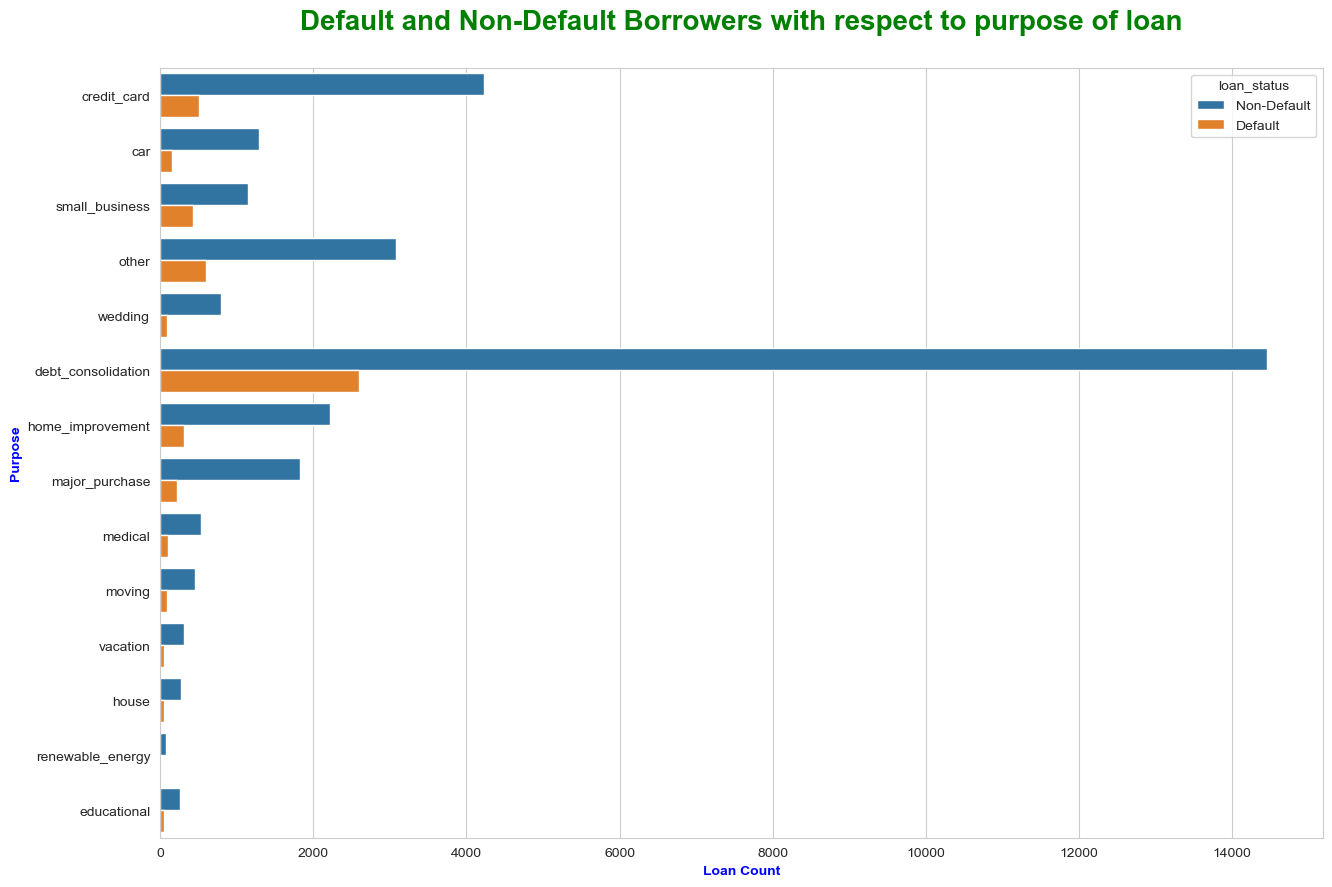

                    %Tot.Default  %Tot.Non-Default  %Total  Ratio  \
purpose                                                             
wedding                     0.25              2.21    2.46   0.11   
major_purchase              0.60              5.04    5.64   0.12   
credit_card                 1.40             11.68   13.08   0.12   
car                         0.44              3.58    4.01   0.12   
home_improvement            0.87              6.13    6.99   0.14   
vacation                    0.14              0.86    1.01   0.17   
debt_consolidation          7.15             39.86   47.01   0.18   
medical                     0.28              1.48    1.76   0.19   
house                       0.15              0.77    0.91   0.19   
other                       1.65              8.50   10.16   0.19   
moving                      0.25              1.27    1.51   0.20   
educational                 0.15              0.71    0.86   0.21   
renewable_energy            0.05  

In [36]:
## Identifying various purposes for which loan was taken and the comparison for defaults and successful pay-offs

fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(y='purpose',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to purpose of loan\n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabel('Loan Count',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Purpose',fontsize=10,fontweight='bold',c='b')
plt.show()
print(get_default_non_default_loan_percentage_and_ratio('purpose'))

### Inference
- From the above bar plot, %Total Default  %Total Non-Default  %Total  Ratio  % of Default based on address state of borrower, we can say, the risk of lending a loan increases in the below order,
   - wedding 
   - major_purchase
   - credit_card
   - car
   - home_improvement
   - vacation
   - debt_consolidation
   - medical
   - house
   - other
   - moving
   - educational
   - renewable_energy
   - small_business
   
- Risk involved in lending loan to for the purpose of small_business is more and is less for wedding.

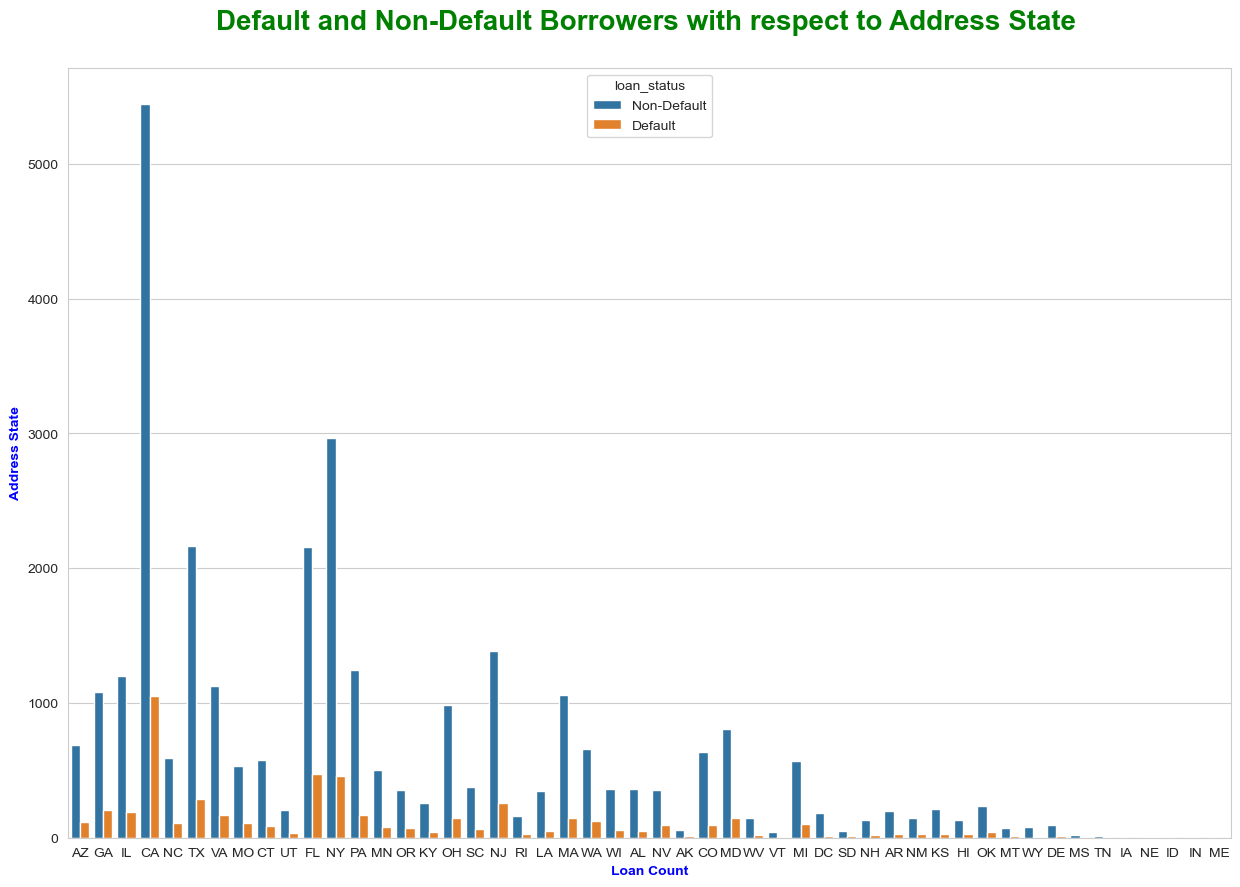

            %Tot.Default  %Tot.Non-Default  %Total  Ratio  % of Default
addr_state                                                             
WY                  0.01              0.21    0.22   0.04             3
DC                  0.03              0.50    0.53   0.07             6
MS                  0.01              0.05    0.05   0.12            10
DE                  0.03              0.26    0.30   0.12            11
AR                  0.07              0.55    0.63   0.13            11
VT                  0.02              0.13    0.14   0.13            11
TX                  0.78              5.97    6.75   0.13            11
KS                  0.08              0.59    0.66   0.13            11
AL                  0.13              1.00    1.14   0.13            11
TN                  0.01              0.04    0.05   0.13            11
PA                  0.47              3.42    3.89   0.14            12
WV                  0.06              0.40    0.45   0.14       

In [37]:
## comparison against the state address

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='addr_state',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to Address State \n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabel('Loan Count',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Address State',fontsize=10,fontweight='bold',c='b')
#annotate_plot(ax)
plt.show()
print(get_default_non_default_loan_percentage_and_ratio('addr_state'))

### Inference
- From the above bar plot, %Total Default  %Total Non-Default  %Total  Ratio  % of Default based on address state of borrower, we can say,

    - Wyoming state borrowers are pretty good in paying off the loan. Whereas, the 60% loan borrowers from Nebraska state are not paying off the loan. But, In total only 5 people from NE have taken loan and out of which 3 are defaulter. So, Could be excluded from consideration

    - California, New-York, Texas and Florida are the states where people are taking loans from Lending Club

    - Risk of lending a loan between these 4 states is in the order from TX, NY, CA, FL. Out of these 4 TX is performing good and FL is little risky to lend loan.

            %Tot.Default  %Tot.Non-Default  %Total  Ratio  % of Default
emp_length                                                             
9                   0.41              2.75    3.16   0.15            13
2                   1.48              9.78   11.26   0.15            13
3                   1.44              9.03   10.47   0.16            13
0                   1.67             10.21   11.88   0.16            14
6                   0.80              4.87    5.67   0.16            14
8                   0.52              3.13    3.64   0.16            14
5                   1.19              7.12    8.31   0.17            14
1                   1.24              7.14    8.38   0.17            14
7                   0.67              3.80    4.47   0.18            15
4                   1.80              9.72   11.52   0.19            15
10                  3.34             17.91   21.25   0.19            15


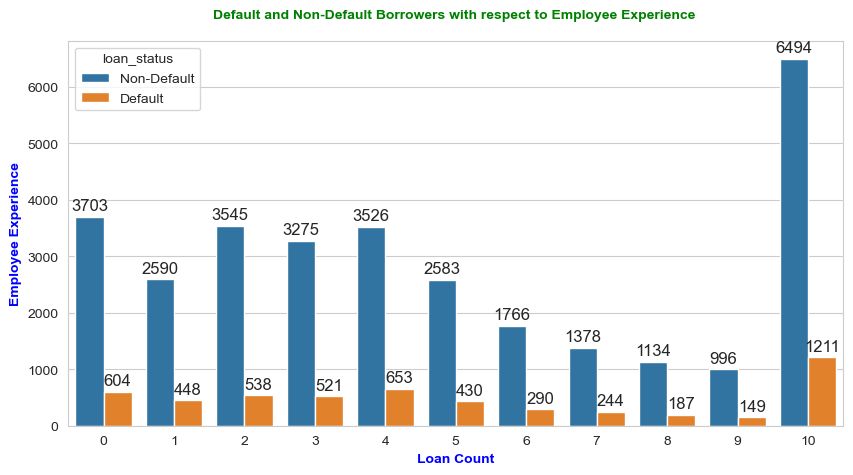

In [38]:
# Analyse employee experiences (imputation not performed)

print(get_default_non_default_loan_percentage_and_ratio('emp_length'))

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='emp_length',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to Employee Experience \n', fontsize=10, fontweight='bold',c='g')
ax.set_xlabel('Loan Count',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Employee Experience',fontsize=10,fontweight='bold',c='b')
annotate_plot(ax)
plt.show()


### Inference 
- From the above bar plot, %Total Default  %Total Non-Default  %Total  Ratio  % of Default based on employee experience, we can say,

    - 10+ year experience employees have taken loans more than other employees, followed by 0, 4, 2, 3 and so on year experience employees. 
    - 9 year Experience employee are paying off the loan pretty good compared to others
    - Risk of lending loan increases in the order wrt employee experience as below,
        - 9, 2, 3, 0, 6, 8, 5, 1, 7, 4, 10

## Bivariate Descrete Analysis


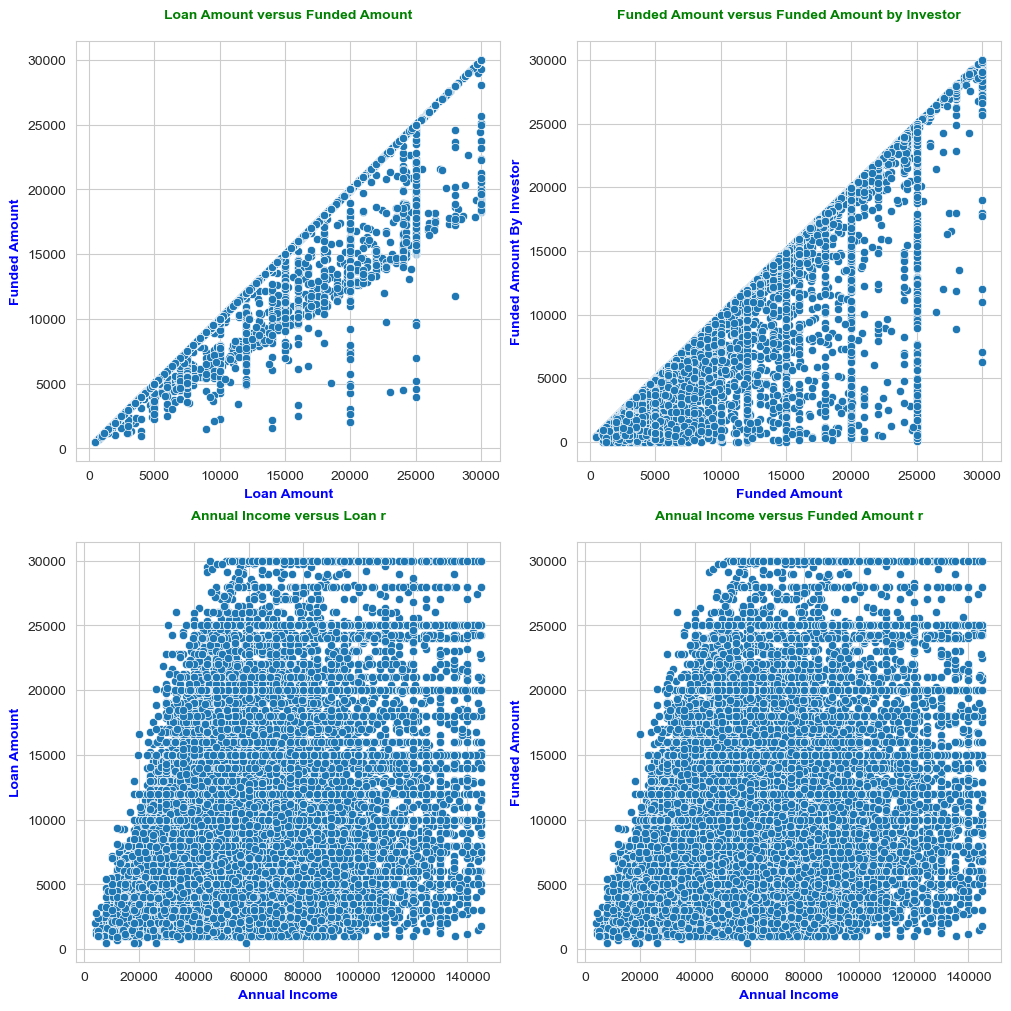

In [39]:

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey= False, constrained_layout = True)

# Curious to check if approver approved most of the loans with the requested amount
sns.scatterplot(ax=ax[0,0],x = df_lending_club.loan_amnt, y = df_lending_club.funded_amnt)
ax[0,0].set_title('Loan Amount versus Funded Amount\n',fontsize="10",fontweight='bold' ,c='g')
ax[0,0].set_xlabel('Loan Amount',fontsize=10,fontweight='bold',c='b')
ax[0,0].set_ylabel('Funded Amount',fontsize=10,fontweight='bold',c='b')

# Curious to check if investor is lending the approved loans
sns.scatterplot(ax=ax[0,1],x = df_lending_club.funded_amnt, y = df_lending_club.funded_amnt_inv)
ax[0,1].set_title('Funded Amount versus Funded Amount by Investor\n',fontsize="10",fontweight='bold' ,c='g')
ax[0,1].set_xlabel('Funded Amount',fontsize=10,fontweight='bold',c='b')
ax[0,1].set_ylabel('Funded Amount By Investor',fontsize=10,fontweight='bold',c='b')

# Curious to check how annual income plays it's role with the loan amount
sns.scatterplot(ax=ax[1,0],x = df_lending_club.annual_inc, y = df_lending_club.loan_amnt)
ax[1,0].set_title('Annual Income versus Loan r\n',fontsize="10",fontweight='bold' ,c='g')
ax[1,0].set_xlabel('Annual Income',fontsize=10,fontweight='bold',c='b')
ax[1,0].set_ylabel('Loan Amount',fontsize=10,fontweight='bold',c='b')

# Curious to check if the approver approves loan for higher salaried people compared to lower salaried
sns.scatterplot(ax=ax[1,1],x = df_lending_club.annual_inc, y = df_lending_club.funded_amnt)
ax[1,1].set_title('Annual Income versus Funded Amount r\n',fontsize="10",fontweight='bold' ,c='g')
ax[1,1].set_xlabel('Annual Income',fontsize=10,fontweight='bold',c='b')
ax[1,1].set_ylabel('Funded Amount',fontsize=10,fontweight='bold',c='b')

plt.show()

### <font color='green'> Inference <font>

- ` Interestingly`, 
    - From the scatter plot of Loan Amount versus Funded Amount, most likey the requested loan amount gets approved.
    - From the scatter plot of Funded Amount versus Funded Amount by Investor, most likey the Investors are lending the money to borrowers after the loan gets approved by an approver.
    - From the scatter plot of Annual Income versus Loan amount, it look like the offered loan amount for level income employee maxes at ` $30,000 `<br>
    - From the scatter plot of Annual Income versus Funded amount, it look like the Maximum loan that an approver is approving is ` $30,000 `<br>
- FROM ABOVE OBSERVATION, what we can say is that if a borrower makes a loan request for <= ` $30,000 `, then they are can get approved and receive loan from investors.  


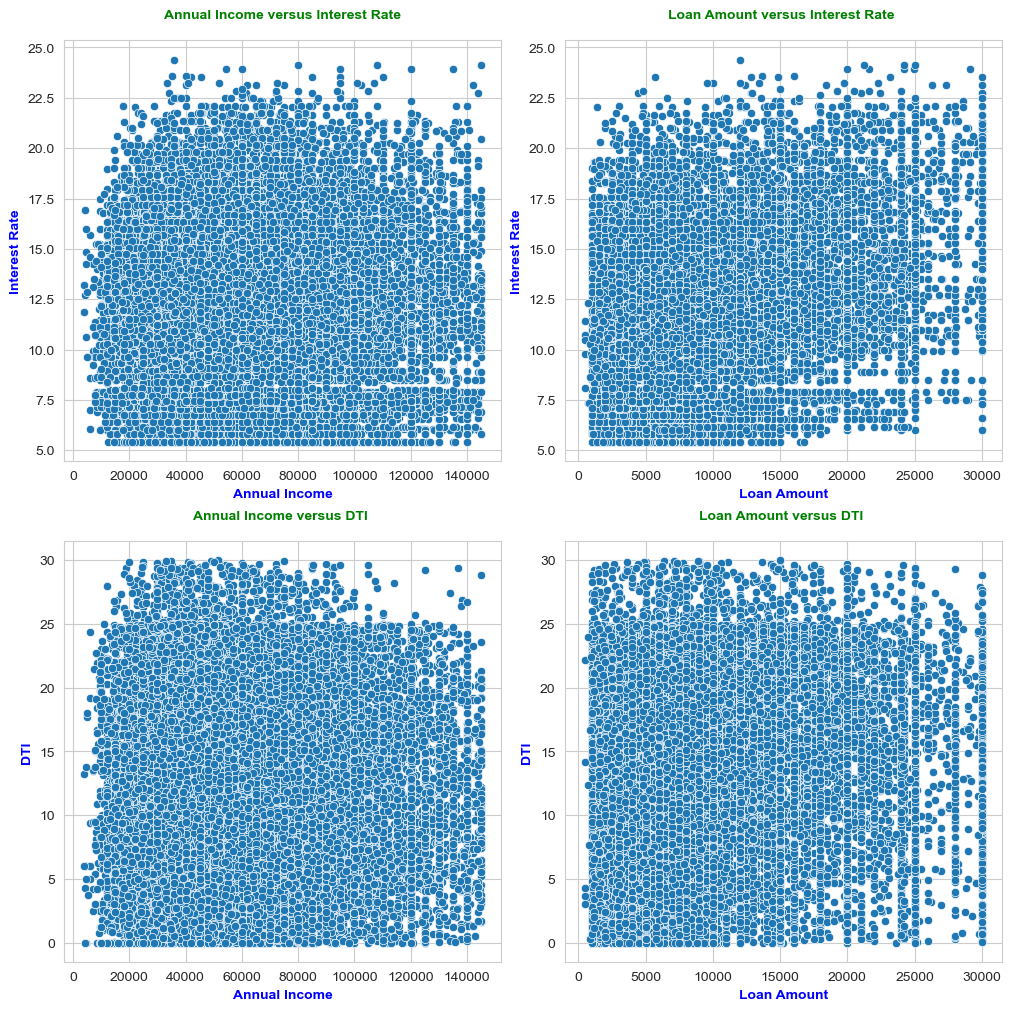

In [40]:


fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey= False, constrained_layout = True)

# Curious to check if Annual Income and Interest Rate are related
sns.scatterplot(ax=ax[0,0],x = df_lending_club.annual_inc, y = df_lending_club.int_rate)
ax[0,0].set_title('Annual Income versus Interest Rate\n',fontsize="10",fontweight='bold' ,c='g')
ax[0,0].set_xlabel('Annual Income',fontsize=10,fontweight='bold',c='b')
ax[0,0].set_ylabel('Interest Rate',fontsize=10,fontweight='bold',c='b')

# Curious to check how loan amount and interest rate are related
sns.scatterplot(ax=ax[0,1],x = df_lending_club.loan_amnt, y = df_lending_club.int_rate)
ax[0,1].set_title('Loan Amount versus Interest Rate \n',fontsize="10",fontweight='bold' ,c='g')
ax[0,1].set_xlabel('Loan Amount',fontsize=10,fontweight='bold',c='b')
ax[0,1].set_ylabel('Interest Rate',fontsize=10,fontweight='bold',c='b')

# Curious to check how annual income versus DTI looks
sns.scatterplot(ax=ax[1,0],x = df_lending_club.annual_inc, y = df_lending_club.dti)
ax[1,0].set_title('Annual Income versus DTI \n',fontsize="10",fontweight='bold' ,c='g')
ax[1,0].set_xlabel('Annual Income',fontsize=10,fontweight='bold',c='b')
ax[1,0].set_ylabel('DTI ',fontsize=10,fontweight='bold',c='b')

# Curious to check how annual income versus DTI looks
sns.scatterplot(ax=ax[1,1],x = df_lending_club.loan_amnt, y = df_lending_club.dti)
ax[1,1].set_title('Loan Amount versus DTI \n',fontsize="10",fontweight='bold' ,c='g')
ax[1,1].set_xlabel('Loan Amount',fontsize=10,fontweight='bold',c='b')
ax[1,1].set_ylabel('DTI ',fontsize=10,fontweight='bold',c='b')

plt.show()


- There is not much relation between 
    - Annual Income and Internet Rate
    - Loan Amount and Internet Rate
    - Annual Income and DTI
    - Loan Amount and DTI 

## Bivariate Correlation Matrix

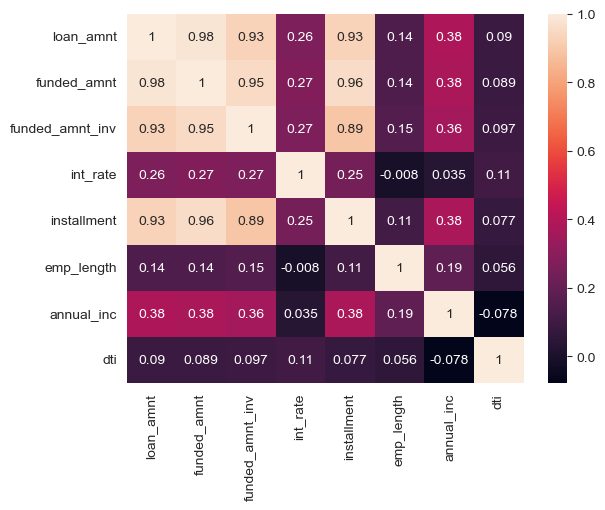

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti
loan_amnt,1.000000,0.981738,0.931463,0.264968,0.929712,0.141207,0.383026,0.089894
funded_amnt,0.981738,1.000000,0.950011,0.272458,0.955528,0.141305,0.379143,0.088694
funded_amnt_inv,0.931463,0.950011,1.000000,0.266257,0.893888,0.153703,0.361403,0.097467
int_rate,0.264968,0.272458,0.266257,1.000000,0.245402,-0.008014,0.034963,0.108190
installment,0.929712,0.955528,0.893888,0.245402,1.000000,0.112416,0.378397,0.076577
emp_length,0.141207,0.141305,0.153703,-0.008014,0.112416,1.000000,0.189504,0.056308
annual_inc,0.383026,0.379143,0.361403,0.034963,0.378397,0.189504,1.000000,-0.078115
dti,0.089894,0.088694,0.097467,0.108190,0.076577,0.056308,-0.078115,1.000000


In [41]:
sns.heatmap(df_lending_club.corr(), 
        xticklabels=df_lending_club.corr().columns,
        yticklabels=df_lending_club.corr().columns,annot=True)
plt.show()
df_lending_club.corr()

#### Inference from correlation
   - There is a high positive correlation between loan amount, funded amount, funded amount by investor and installment. This makes sense in general as the loan requested is directly proportional to approved and the actual lened amount to borrowers.
   - There is a slight positive correlation between loan amount to annual income, funded amount, funded by investor
   - Annual income to dti correlation is negative, which makes sense as the debt increases compared to income when a borrower takes a loan